In [138]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [139]:
import tensorflow as tf # models
import numpy as np # math computation
import matplotlib.pyplot as plt # plotting bar chart
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, InputLayer, BatchNormalization, MaxPooling2D, Dropout
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.optimizers import Adam
import os

In [140]:
# the path of dataset in my local storage
trainDataPath = 'C:/Users/User/Downloads/pneumonia/train'
validationDataPath = 'C:/Users/User/Downloads/pneumonia/val'
testDataPath = 'C:/Users/User/Downloads/pneumonia/test'

# rescaling
data_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

# getting the data of respective type
trainDataset = data_generator.flow_from_directory(
    trainDataPath,
    target_size = (224,224),
    batch_size = 32,
    class_mode = 'binary',
    shuffle = True
)
validationDataset = data_generator.flow_from_directory(
    validationDataPath,
    target_size = (224,224),
    batch_size = 32,
    class_mode = 'binary'
)
testDataset = data_generator.flow_from_directory(
    testDataPath,
    target_size = (224,224),
    batch_size = 32,
    class_mode = 'binary'
)

Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.



Class Indices:
{'NORMAL': 0, 'PNEUMONIA': 1}


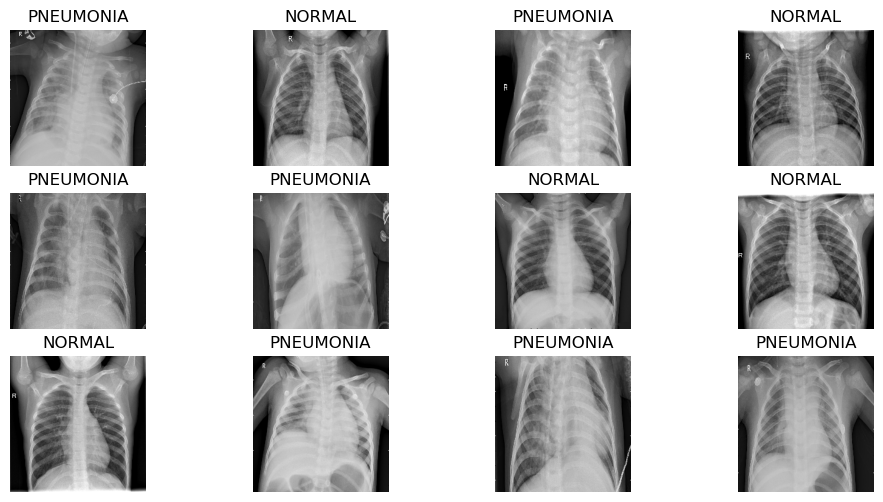

In [141]:
# checking if the data is loaded correctly (trainDataset)

class_indices = trainDataset.class_indices # two classes of train dataset
print("\nClass Indices:")
print(class_indices)

# Get a batch of images and labels from the training dataset
batch_images, batch_labels = trainDataset.next()

# Convert numerical labels to actual class labels
actual_labels = [list(class_indices.keys())[list(class_indices.values()).index(label)] for label in batch_labels]

# Display the images with actual class labels
plt.figure(figsize=(12, 6))
for i in range(12): # number of images to show
    plt.subplot(3, 4, i+1)
    plt.imshow(batch_images[i])
    plt.title(f"{actual_labels[i]}")
    plt.axis('off')

plt.show()


In [142]:
# building my model


model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))  # Adding dropout for regularization (helps to avoid overfitting)

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))  # Adding dropout for regularization

model.add(Flatten())

model.add(Dense(256, activation='relu'))  
model.add(Dropout(0.5))  # Adding dropout for regularization

model.add(Dense(128, activation='relu'))  
model.add(Dropout(0.5))  # Adding dropout for regularization

model.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_21 (Conv2D)          (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_19 (MaxPooli  (None, 111, 111, 32)      0         
 ng2D)                                                           
                                                                 
 conv2d_22 (Conv2D)          (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_20 (MaxPooli  (None, 54, 54, 64)        0         
 ng2D)                                                           
                                                                 
 dropout_3 (Dropout)         (None, 54, 54, 64)        0         
                                                                 
 conv2d_23 (Conv2D)          (None, 52, 52, 128)     

In [143]:
# compiling the model

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# model.compile(optimizer = Adam(learning_rate = 0.01),
#               loss = BinaryCrossentropy(),
#               metrics = 'accuracy'
#               )

In [144]:
# training the model and evaluating 

history = model.fit(trainDataset, validation_data=validationDataset, epochs=10, verbose=1)

Epoch 1/10
163/163 [==============================] - 205s 1s/step - loss: 0.4193 - accuracy: 0.8334 - val_loss: 0.6032 - val_accuracy: 0.6875
Epoch 2/10
163/163 [==============================] - 201s 1s/step - loss: 0.1473 - accuracy: 0.9477 - val_loss: 0.3453 - val_accuracy: 0.8750
Epoch 3/10
163/163 [==============================] - 185s 1s/step - loss: 0.1197 - accuracy: 0.9607 - val_loss: 0.1946 - val_accuracy: 0.9375
Epoch 4/10
163/163 [==============================] - 194s 1s/step - loss: 0.0960 - accuracy: 0.9657 - val_loss: 0.2292 - val_accuracy: 0.8750
Epoch 5/10
163/163 [==============================] - 198s 1s/step - loss: 0.0795 - accuracy: 0.9724 - val_loss: 0.2400 - val_accuracy: 0.8750
Epoch 6/10
163/163 [==============================] - 220s 1s/step - loss: 0.0619 - accuracy: 0.9758 - val_loss: 0.2660 - val_accuracy: 0.8750
Epoch 7/10
163/163 [==============================] - 245s 2s/step - loss: 0.0649 - accuracy: 0.9780 - val_loss: 0.1975 - val_accuracy: 0.9375

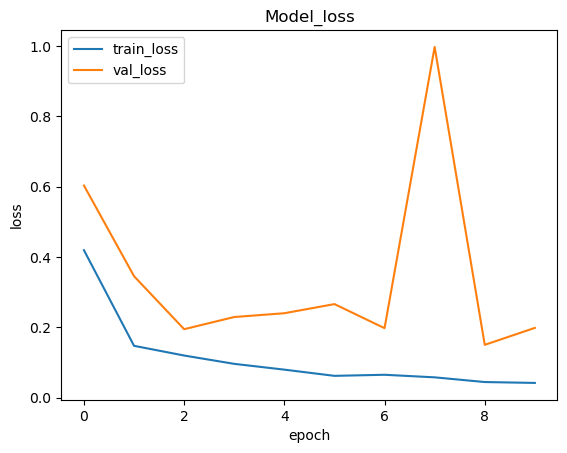

In [145]:
# comparing the train and validation loss

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model_loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss', 'val_loss'])
plt.show()

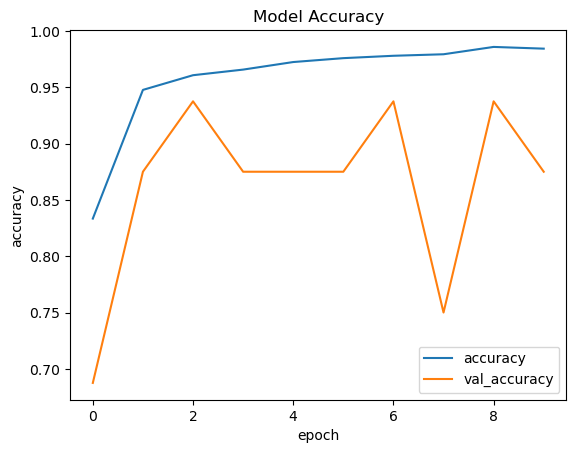

In [146]:
# comparing the train and validation accuracy

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['accuracy', 'val_accuracy'])
plt.show()

In [147]:
# Evaluating the model on the test dataset

test_loss, test_accuracy = model.evaluate(testDataset, steps=testDataset.samples // 32)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

19/19 [==============================] - 10s 534ms/step - loss: 1.2628 - accuracy: 0.7928
Test Accuracy: 79.28%


1/1 [==============================] - 0s 157ms/step


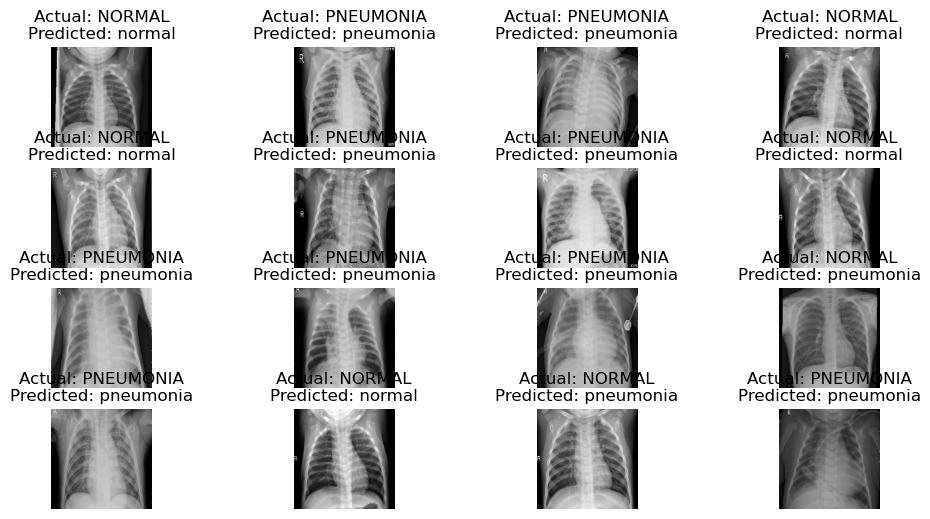

In [155]:
# visualizing how good my model is

# Getting a batch of test images and labels
test_images, test_labels = testDataset.next()

# Making predictions using the trained model
predictions = model.predict(test_images)

# Converting numerical labels to actual class labels for both actual and predicted labels
# if len(test_labels.shape) > 1:
#     actual_labels = [list(class_indices.keys())[list(class_indices.values()).index(label)] for label in test_labels.argmax(axis=1)]
# else:
actual_labels = [list(class_indices.keys())[int(round(label))] for label in test_labels]

# defining when should my model say which one is pneumonia and which one is normal
threshold = 0.5
predicted_labels = ["pneumonia" if prediction > threshold else "normal" for prediction in predictions]

# Displaying the images with actual and predicted labels
plt.figure(figsize=(12, 6))
for i in range(16):
    plt.subplot(4, 4, i + 1)
    plt.imshow(test_images[i])
    plt.title(f"Actual: {actual_labels[i]}\nPredicted: {predicted_labels[i]}")
    plt.axis('off')

plt.show()

